**Purpose**: Analyze the website analytics (Google Analytics and then Plausible) of Galaxy Training Material website

In [1]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os

from dateutil import relativedelta
from github import Github

**Get data**

- on Google Analytics

    1. Go to **Customization** then **Custom Reports**
    2. Open each report and for each
        1. Select time from Nov 1, 2018 to today
        2. Show 50 rows
        3. Export in CSV in `../data/topics_analytics/google_analytics` folder following the name `<topic>.csv`
        
- on Plausible
    1. Generate a Personal access tokens on GitHub (in Setting)
    2. Add it to the `../config.yaml` after `github:`

# Google analytics

In [2]:
# create range for every month
delta = 1
start = datetime.datetime(year=2018, month=11, day=1)
end = datetime.datetime(year=2020, month=11, day=1)
r = relativedelta.relativedelta(end, start)
month_nb = 12*r.years + r.months + 1
months = pd.date_range(start, periods=month_nb, freq='M')
month_idx = pd.PeriodIndex(months)

In [3]:
month_idx

PeriodIndex(['2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
             '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
             '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11'],
            dtype='period[M]')

Number of months for the extraction

In [4]:
month_nb

25

In [5]:
def fix_users_column(df):
    """Fix the users columns"""
    df = df.copy()
    if df.visitors.dtypes != 'int':
        df.visitors =  df.visitors.str.replace(',', '').astype(int)
    return df

def get_ga_visitors(fp, name):
    """Extract and prepare user stat
    
    :param fp: path to CSV extracted from Google Analytics
    :param name: name of resources on which users are extracted

    :return: dataframe with 2 columns (month index and number of users)
    """
    return (pd.read_csv(fp, header=5)
        .rename(columns = {
            'Month Index': 'month_nb',
            'Users': 'visitors'})
        .assign(
            month_nb=lambda x: x['month_nb'].astype(int))
        .pipe(fix_users_column)
        .rename(columns = {'visitors': name})
        .query('month_nb < %s' % month_nb))

In [6]:
ga_visitors_over_month = (pd.DataFrame({'month_nb': range(month_nb), 'month': month_idx})
    .merge(get_ga_visitors('../data/google_analytics/all.csv', 'All'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/introduction.csv', 'Introduction to Galaxy Analyses'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/assembly.csv', 'Assembly'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/climate.csv', 'Climate'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/computational-chemistry.csv', 'Computational chemistry'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/ecology.csv', 'Ecology'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/epigenetics.csv', 'Epigenetics'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/genome-annotation.csv', 'Genome Annotation'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/imaging.csv', 'Imaging'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/metabolomics.csv', 'Metabolomics'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/metagenomics.csv', 'Metagenomics'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/proteomics.csv', 'Proteomics'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/sequence-analysis.csv', 'Sequence analysis'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/statistics.csv', 'Statistics and machine learning'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/transcriptomics.csv', 'Transcriptomics'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/variant-analysis.csv', 'Variant Analysis'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/visualisation.csv', 'Visualisation'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/galaxy-interface.csv', 'Using Galaxy and Managing your Data'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/admin.csv', 'Galaxy Server administration'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/dev.csv', 'Development in Galaxy'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/contributing.csv', 'Contributing to the Galaxy Training Material'), how='outer')
    .merge(get_ga_visitors('../data/google_analytics/instructors.csv', 'Teaching and Hosting Galaxy training'), how='outer')
    .set_index('month')
    .fillna(0)
    .drop(columns=['month_nb']))
ga_visitors_over_month.head()

,All,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,...,Sequence analysis,Statistics and machine learning,Transcriptomics,Variant Analysis,Visualisation,Using Galaxy and Managing your Data,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training
month,,,,,,,,,,,,,,,,,,,,,
2018-11,6175,2223,466,0.0,0.0,0.0,0.0,312,8,17,...,1011,58,1245,550,0.0,0.0,0.0,104,70,22
2018-12,5933,1691,401,0.0,1.0,0.0,0.0,291,7,25,...,948,69,1983,461,0.0,0.0,0.0,83,46,23
2019-01,6507,1764,557,0.0,0.0,1.0,0.0,539,10,36,...,1223,153,1436,598,0.0,0.0,0.0,132,82,23
2019-02,7402,1799,568,0.0,0.0,0.0,0.0,766,22,45,...,1395,166,1644,600,0.0,0.0,0.0,120,103,23
2019-03,9850,2125,709,0.0,1.0,1.0,0.0,1017,34,59,...,1695,169,2561,831,0.0,0.0,0.0,140,107,28


In [7]:
ga_visitors_over_month.tail()

,All,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,...,Sequence analysis,Statistics and machine learning,Transcriptomics,Variant Analysis,Visualisation,Using Galaxy and Managing your Data,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training
month,,,,,,,,,,,,,,,,,,,,,
2020-07,21998,3103,1191,91.0,1398.0,256.0,1251.0,1301,160,272,...,2160,800,8519,1356,322.0,592.0,2080.0,210,171,71
2020-08,19703,2516,865,102.0,1343.0,195.0,0.0,1165,118,222,...,1907,613,7366,1166,319.0,385.0,0.0,109,123,43
2020-09,22637,3247,1183,96.0,1475.0,246.0,1306.0,1408,190,244,...,2310,617,8142,1287,384.0,612.0,1911.0,149,142,60
2020-10,31753,4049,1425,187.0,1904.0,275.0,1921.0,1923,226,324,...,3002,788,11977,1802,405.0,773.0,2779.0,134,256,70
2020-11,37306,4297,1717,219.0,2135.0,338.0,2214.0,2197,270,342,...,3728,912,15105,1902,380.0,778.0,3175.0,127,279,85


In [8]:
ga_visitors_over_month.All.mean()

17196.32

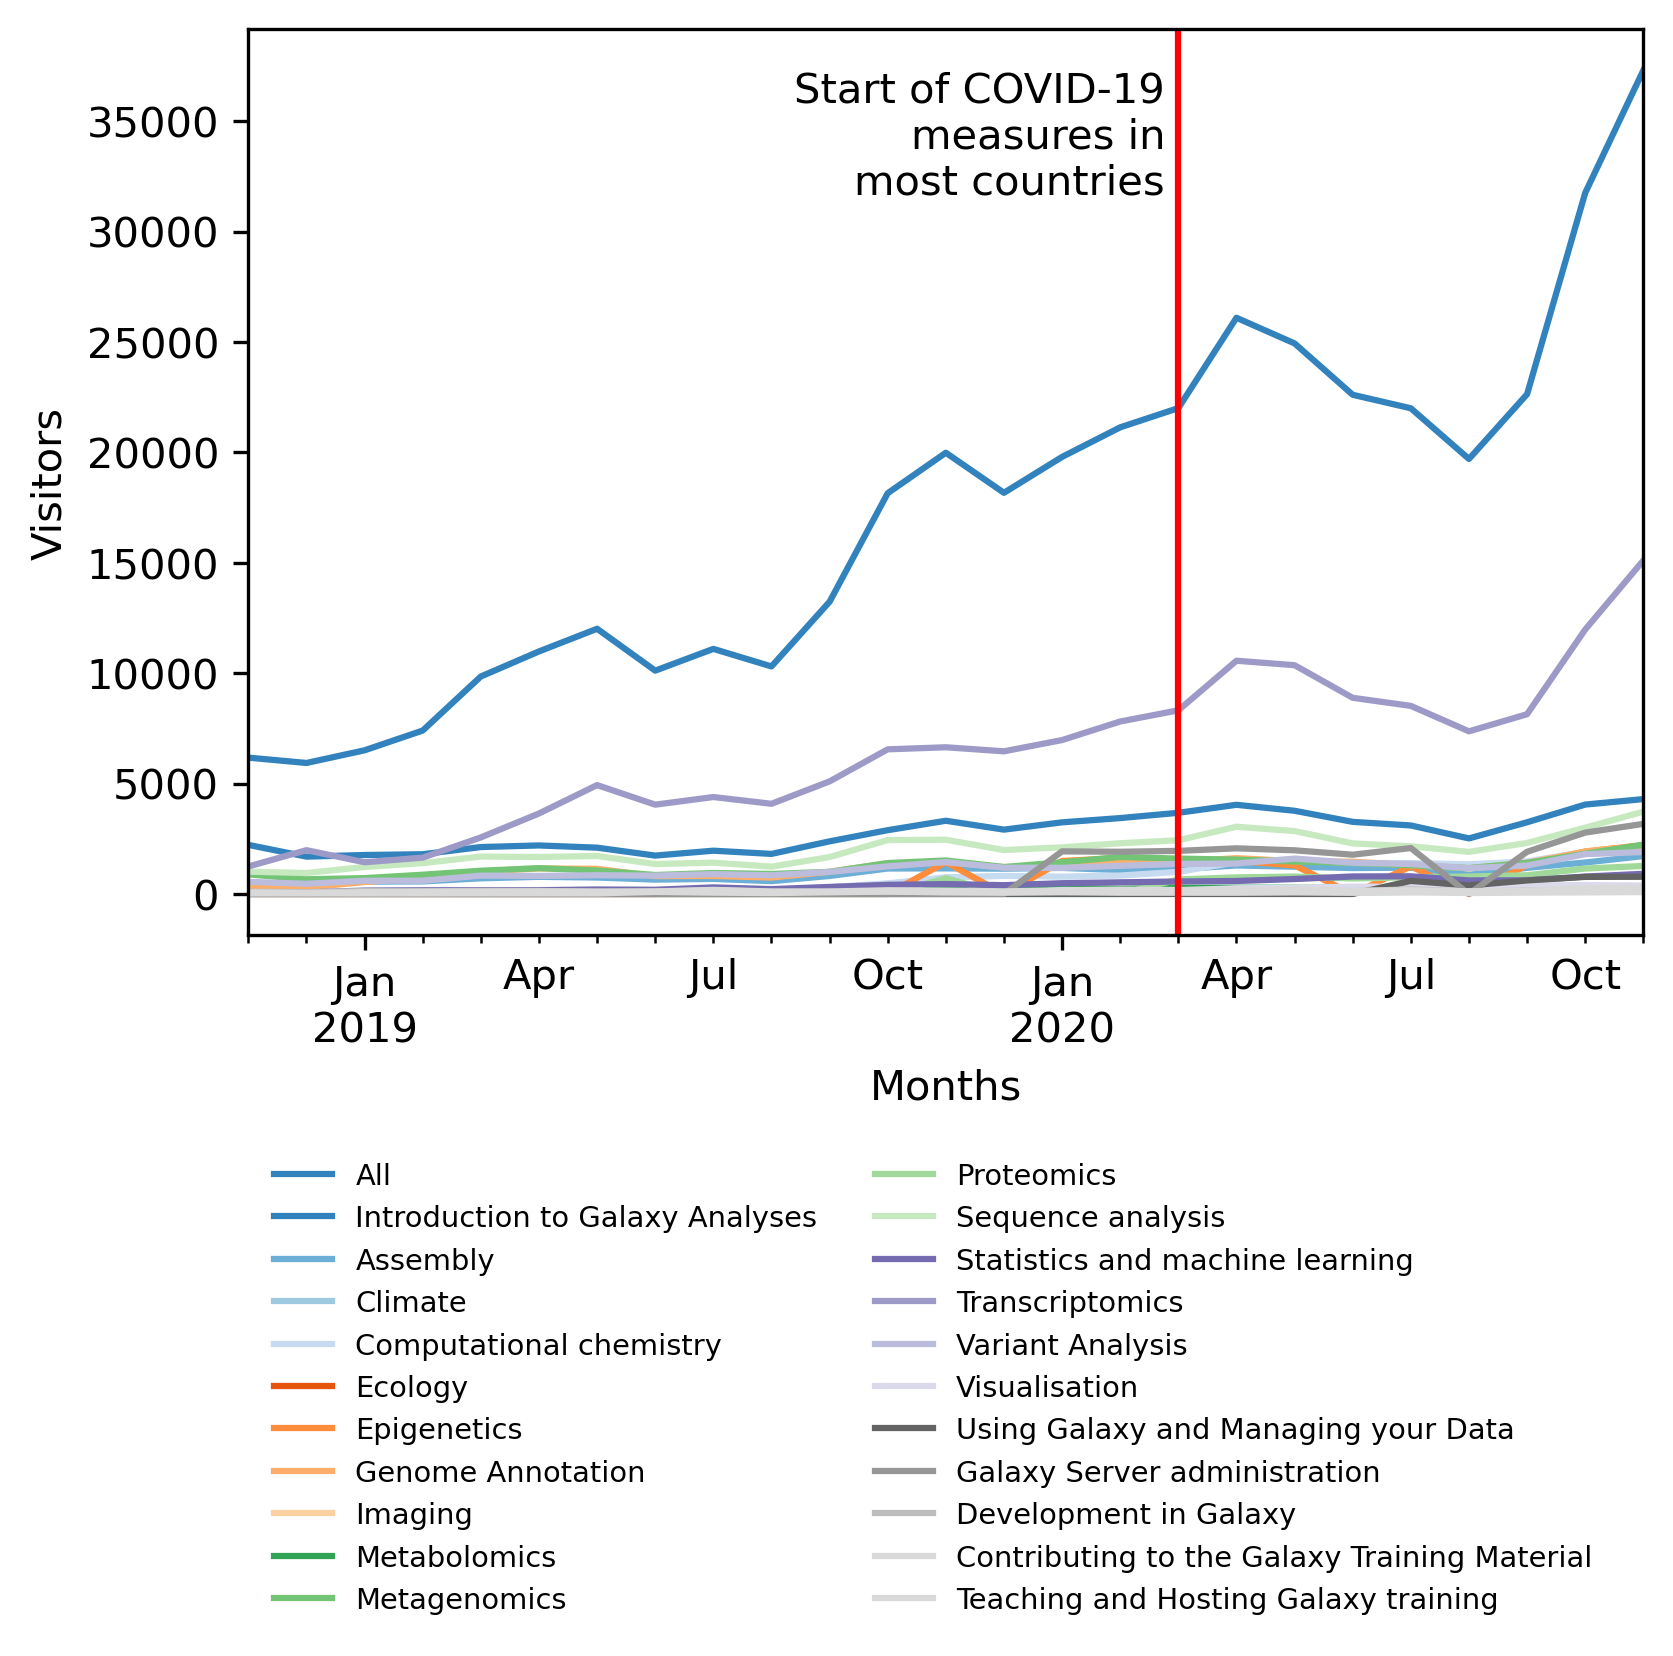

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(300)
ga_visitors_over_month.plot(ax=ax, colormap='tab20c')
plt.xlabel('Months')
plt.ylabel('Visitors')
plt.axvline('2020-03-01', color='red')
plt.text(
    '2020-03-01', 
    ga_visitors_over_month.max().max(), 
    'Start of COVID-19 \nmeasures in \nmost countries ',
    horizontalalignment='right',
    verticalalignment='top')
ax.legend(
    loc='center left',
    bbox_to_anchor=(0, -0.5),
    frameon=False,
    ncol=2,
    fontsize='x-small')

# Plausible

In [10]:
# get GitHub config
with open("../config.yaml", "r") as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)
# connect to GitHub
token = config['github']
if token is None:
    token = os.environ.get('GITHUB_TOKEN', None)
g = Github(token)
print(g.get_rate_limit())
# to get limit of API request: g.get_rate_limit()
# retrieve the hub repository
repo = g.get_user("galaxyproject").get_repo("training-material")

RateLimit(core=Rate(reset=2022-07-26 14:34:20, remaining=4891, limit=5000))


In [11]:
def get_url(topic=None, tuto=None, intro=None):
    '''Build URL for plausible
    
    :param topic: name of topic (optional)
    :param tuto: name of tutorial (optional)
    '''
    date = datetime.datetime.now().strftime("%Y-%m-%d")
    baseurl = "https://plausible.galaxyproject.eu/training.galaxyproject.org"
    url = "%s/visitors.csv?period=custom&from=2020-12-01&to=%s" % (baseurl, date)
    endurl = "%22%7D"
    if topic:
        url += "&filters=%7B%22page%22%3A%22%2Ftraining-material%2Ftopics%2F"
        if tuto:
            return url + topic + "%2Ftutorials%2F" + tuto + "%2Ftutorial.html" + endurl
        elif intro:
            return url + topic + "%2Fslides%2F" + intro + ".html" + endurl
        else:
            return url + topic + "%2F" + endurl
    else:
        return url

def format_plausible_stat(url, name):
    """Get and format plausible stat
    
    :param url: URL to plausible stat
    :param name: new name for visitor column
    """
    df = (pd.read_csv(url)
      .rename(columns = {
          'Date': 'date',
          'Visitors': 'visitors'})
      .assign(
          visitors= lambda x: x['visitors'].astype(int),
          date=lambda x: pd.to_datetime(x['date']))
      .assign(
          month=lambda x: x['date'].dt.to_period("M"))
      .drop(columns=['date'])
      .groupby(['month'])
      .sum()
      .rename(columns = {'visitors': name})
      .reset_index())
    return df

def get_topic_title(topic_n):
    '''
    :param topic_n: name of the topic
    
    :return: title of the topic in metadata file
    '''
    metadata_f = repo.get_contents("topics/%s/metadata.yaml" % topic_n)
    metadata_f_content = yaml.load(base64.b64decode(metadata_f.content), Loader=yaml.FullLoader)
    return metadata_f_content['title']

In [12]:
topic_visitor_dfs = {}
pl_visitors_over_month = format_plausible_stat(get_url(), "All")

# parse GitHub repository to get all topics and tutorials and extract their stats
for topic in repo.get_contents("topics"):
    # get topic details
    topic_n = topic.name
    topic_t = get_topic_title(topic_n)
    print(topic_t)
    # get topic page stat
    url = get_url(topic=topic_n)
    topic_df = format_plausible_stat(url, "index")
    # check for introduction and tuto folders
    has_tuto_folder = False
    has_intro_folder = False
    for topic_c in repo.get_contents("%s" % topic.path):
        if topic_c.name == 'slides':
            has_intro_folder = True
        elif topic_c.name == 'tutorials':
            has_tuto_folder = True
    if has_tuto_folder:
        # parse the tutorials
        for tuto in repo.get_contents("%s/tutorials" % topic.path):
            tuto_n = tuto.name
            url = get_url(topic=topic_n, tuto=tuto_n)
            topic_df = (topic_df
                .merge(format_plausible_stat(url, tuto_n), how='outer'))
    if has_intro_folder:
        # parse the tutorials
        for intro in repo.get_contents("%s/slides" % topic.path):
            intro_n = intro.name
            url = get_url(topic=topic_n, intro=intro_n)
            topic_df = (topic_df
                .merge(format_plausible_stat(url, intro_n), how='outer'))
    # save topic_df
    topic_df = (topic_df
        .set_index('month')
        .drop(columns=["index"])
        .assign(all = lambda x: x.sum(axis=1)))
    topic_visitor_dfs.setdefault(topic_t, topic_df)
    # add topic info to main df
    topic_df = (topic_df
        .filter(['all'])
        .rename(columns = {'all': topic_t})
        .reset_index())
    pl_visitors_over_month = (pl_visitors_over_month
        .merge(topic_df, how='outer'))
    
pl_visitors_over_month = (pl_visitors_over_month
    .set_index('month'))
pl_visitors_over_month.head()

Galaxy Server administration
Assembly
Climate
Computational chemistry
Contributing to the Galaxy Training Material
RDMBites Data Management
Foundations of Data Science
Development in Galaxy
Ecology
Epigenetics
Evolution
Using Galaxy and Managing your Data
Genome Annotation
Imaging
Teaching and Hosting Galaxy training
Introduction to Galaxy Analyses
Metabolomics
Metagenomics
Proteomics
Sequence analysis
Statistics and machine learning
Synthetic Biology
Transcriptomics
Variant Analysis
Visualisation


,All,Galaxy Server administration,Assembly,Climate,Computational chemistry,Contributing to the Galaxy Training Material,RDMBites Data Management,Foundations of Data Science,Development in Galaxy,Ecology,...,Introduction to Galaxy Analyses,Metabolomics,Metagenomics,Proteomics,Sequence analysis,Statistics and machine learning,Synthetic Biology,Transcriptomics,Variant Analysis,Visualisation
month,,,,,,,,,,,,,,,,,,,,,
2020-12,19278,1084,670,82,943,102,0,0,15,170,...,1328,200,1186,740,1444,418,0,7399,906,223
2021-01,18439,1999,478,124,966,90,0,0,8,126,...,1088,209,715,660,1302,290,0,6594,824,226
2021-02,48057,3375,1930,256,2820,311,0,0,49,339,...,4316,424,2643,1983,4687,758,0,19697,2607,610
2021-03,56383,3645,2828,311,2908,396,0,0,54,406,...,4851,657,3549,2145,5104,1113,0,21722,3347,729
2021-04,33967,1916,1294,171,1654,200,0,0,35,308,...,2397,430,2089,1441,2932,924,0,13479,1630,476


In [13]:
pl_visitors_over_month.All.mean()

43759.95

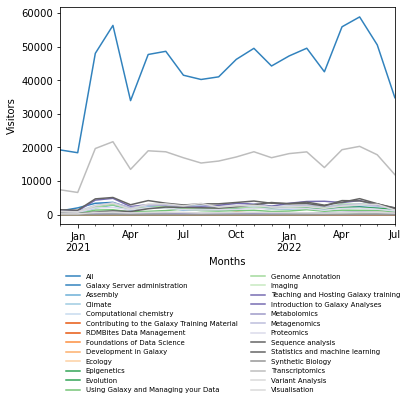

In [14]:
fig, ax = plt.subplots()
pl_visitors_over_month.plot(ax=ax, colormap='tab20c')
plt.xlabel('Months')
plt.ylabel('Visitors')
ax.legend(
    loc='center left',
    bbox_to_anchor=(0, -0.5),
    frameon=False,
    ncol=2,
    fontsize='x-small')

# Combine Google analytics and Plausible

In [15]:
ga_visitors_over_month.tail()

,All,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,...,Sequence analysis,Statistics and machine learning,Transcriptomics,Variant Analysis,Visualisation,Using Galaxy and Managing your Data,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training
month,,,,,,,,,,,,,,,,,,,,,
2020-07,21998,3103,1191,91.0,1398.0,256.0,1251.0,1301,160,272,...,2160,800,8519,1356,322.0,592.0,2080.0,210,171,71
2020-08,19703,2516,865,102.0,1343.0,195.0,0.0,1165,118,222,...,1907,613,7366,1166,319.0,385.0,0.0,109,123,43
2020-09,22637,3247,1183,96.0,1475.0,246.0,1306.0,1408,190,244,...,2310,617,8142,1287,384.0,612.0,1911.0,149,142,60
2020-10,31753,4049,1425,187.0,1904.0,275.0,1921.0,1923,226,324,...,3002,788,11977,1802,405.0,773.0,2779.0,134,256,70
2020-11,37306,4297,1717,219.0,2135.0,338.0,2214.0,2197,270,342,...,3728,912,15105,1902,380.0,778.0,3175.0,127,279,85


In [16]:
pl_visitors_over_month.head()

,All,Galaxy Server administration,Assembly,Climate,Computational chemistry,Contributing to the Galaxy Training Material,RDMBites Data Management,Foundations of Data Science,Development in Galaxy,Ecology,...,Introduction to Galaxy Analyses,Metabolomics,Metagenomics,Proteomics,Sequence analysis,Statistics and machine learning,Synthetic Biology,Transcriptomics,Variant Analysis,Visualisation
month,,,,,,,,,,,,,,,,,,,,,
2020-12,19278,1084,670,82,943,102,0,0,15,170,...,1328,200,1186,740,1444,418,0,7399,906,223
2021-01,18439,1999,478,124,966,90,0,0,8,126,...,1088,209,715,660,1302,290,0,6594,824,226
2021-02,48057,3375,1930,256,2820,311,0,0,49,339,...,4316,424,2643,1983,4687,758,0,19697,2607,610
2021-03,56383,3645,2828,311,2908,396,0,0,54,406,...,4851,657,3549,2145,5104,1113,0,21722,3347,729
2021-04,33967,1916,1294,171,1654,200,0,0,35,308,...,2397,430,2089,1441,2932,924,0,13479,1630,476


In [17]:
visitors_over_month = (
    pd.merge(ga_visitors_over_month.reset_index(), pl_visitors_over_month.reset_index(), how="outer")
    .set_index('month'))
visitors_over_month

,All,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,...,Visualisation,Using Galaxy and Managing your Data,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training,RDMBites Data Management,Foundations of Data Science,Evolution,Synthetic Biology
month,,,,,,,,,,,,,,,,,,,,,
2018-11,6175,2223,466,0.0,0.0,0.0,0.0,312,8,17,...,0.0,0.0,0.0,104,70,22,NaN,NaN,NaN,NaN
2018-12,5933,1691,401,0.0,1.0,0.0,0.0,291,7,25,...,0.0,0.0,0.0,83,46,23,NaN,NaN,NaN,NaN
2019-01,6507,1764,557,0.0,0.0,1.0,0.0,539,10,36,...,0.0,0.0,0.0,132,82,23,NaN,NaN,NaN,NaN
2019-02,7402,1799,568,0.0,0.0,0.0,0.0,766,22,45,...,0.0,0.0,0.0,120,103,23,NaN,NaN,NaN,NaN
2019-03,9850,2125,709,0.0,1.0,1.0,0.0,1017,34,59,...,0.0,0.0,0.0,140,107,28,NaN,NaN,NaN,NaN
2019-04,10985,2197,776,0.0,0.0,1.0,0.0,1156,24,72,...,0.0,0.0,0.0,137,118,28,NaN,NaN,NaN,NaN
2019-05,12012,2097,745,0.0,1.0,0.0,0.0,1138,30,86,...,0.0,0.0,0.0,109,103,27,NaN,NaN,NaN,NaN
2019-06,10115,1738,650,0.0,95.0,1.0,0.0,808,23,74,...,0.0,0.0,0.0,105,114,93,NaN,NaN,NaN,NaN
2019-07,11101,1960,682,0.0,111.0,47.0,0.0,813,38,171,...,0.0,0.0,0.0,173,185,60,NaN,NaN,NaN,NaN


In [18]:
visitors_over_month.All.mean()

29002.37777777778

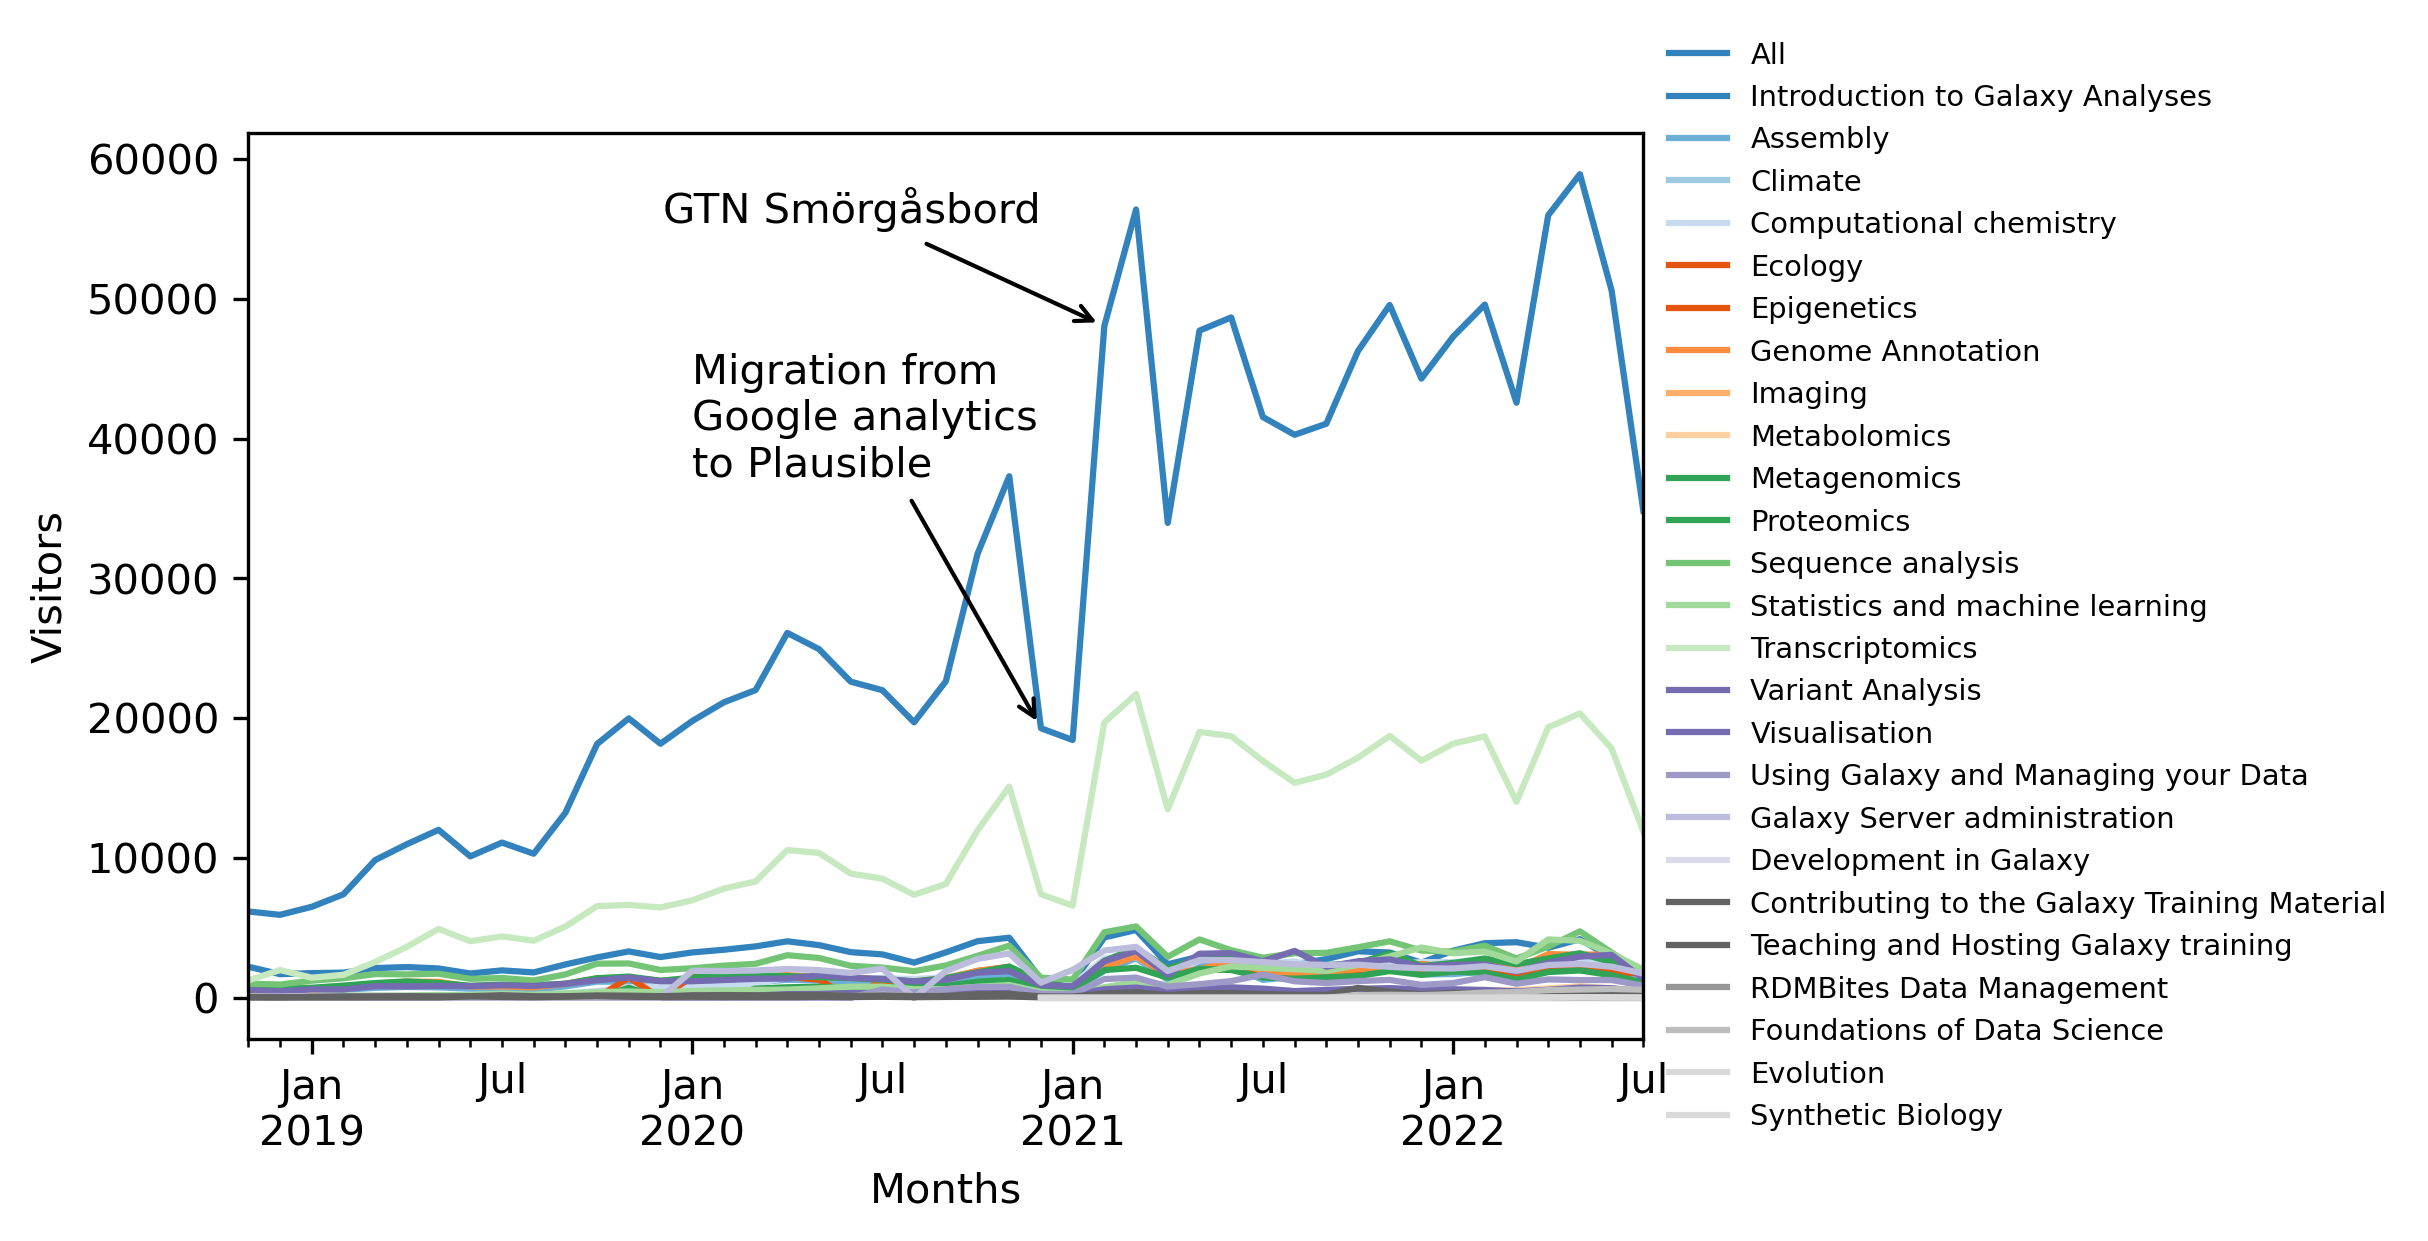

In [19]:
fig, ax = plt.subplots()

fig.set_dpi(300)
visitors_over_month.plot(ax=ax, colormap='tab20c')
plt.xlabel('Months')
plt.ylabel('Visitors')
plt.annotate(
    'Migration from\nGoogle analytics\nto Plausible',
    xy=('2020-12-01', visitors_over_month['All']['2020-12']),
    xycoords='data',
    xytext=('2020-01-01', visitors_over_month['All']['2020-11']),
    arrowprops=dict(arrowstyle="->"))
plt.annotate(
    'GTN Smörgåsbord',
    xy=('2021-02-15', visitors_over_month['All']['2021-02']),
    xycoords='data',
    xytext=('2020-12-01', visitors_over_month['All']['2021-03']),
    arrowprops=dict(arrowstyle="->"),
    horizontalalignment='right',
    verticalalignment='center')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')
plt.savefig('../images/analytics-all-users.png', bbox_inches='tight')

In [20]:
def get_total(df, name):
    """Get total stats per year
    
    :param df: dataframe
    :param name: name of sum column
    """
    return(
        pd.DataFrame(df.sum(), columns=["total"])
        .reset_index()
        .assign(
            total=lambda x: x['total'].astype(int))
        .rename(columns = {
            'total': name,
            'index': 'topic'})
        )

def get_total_per_year(df, year):
    """Get total stats per year
    
    :param year: year
    """
    sub_df = (df
        .reset_index()
        .query('month >= "%s-01" and month <= "%s-12"' % (year, year)))
    return(get_total(sub_df, year))

In [21]:
df = (get_total(visitors_over_month, 'Total')
    .merge(get_total_per_year(visitors_over_month, "2022"), how="outer")
    .merge(get_total_per_year(visitors_over_month, "2021"), how="outer")
    .merge(get_total_per_year(visitors_over_month, "2020"), how="outer")
    .merge(get_total_per_year(visitors_over_month, "2019"), how="outer")
    .set_index('topic')
    .T)  
df

/tmp/ipykernel_62449/514450566.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.sum(), columns=["total"])


topic,All,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,...,Visualisation,Using Galaxy and Managing your Data,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training,RDMBites Data Management,Foundations of Data Science,Evolution,Synthetic Biology
Total,1305107,129703,59006,4998,62919,8092,53283,72109,6182,13798,...,14558,24961,67949,5711,10008,2344,0,3982,173,47
2022,339724,23814,13458,1686,15665,1656,13670,17900,1302,4228,...,4051,8241,14996,1392,2497,350,0,3377,173,47
2021,516197,35011,21015,2384,28314,3139,23225,24147,1992,5043,...,7095,13294,30311,1176,3769,587,0,605,0,0
2020,289258,39968,14128,928,16185,2719,14945,17423,2108,3233,...,3412,3426,22642,1559,2157,732,0,0,0,0
2019,147820,26996,9538,0,2754,578,1443,12036,765,1252,...,0,0,0,1397,1469,630,0,0,0,0


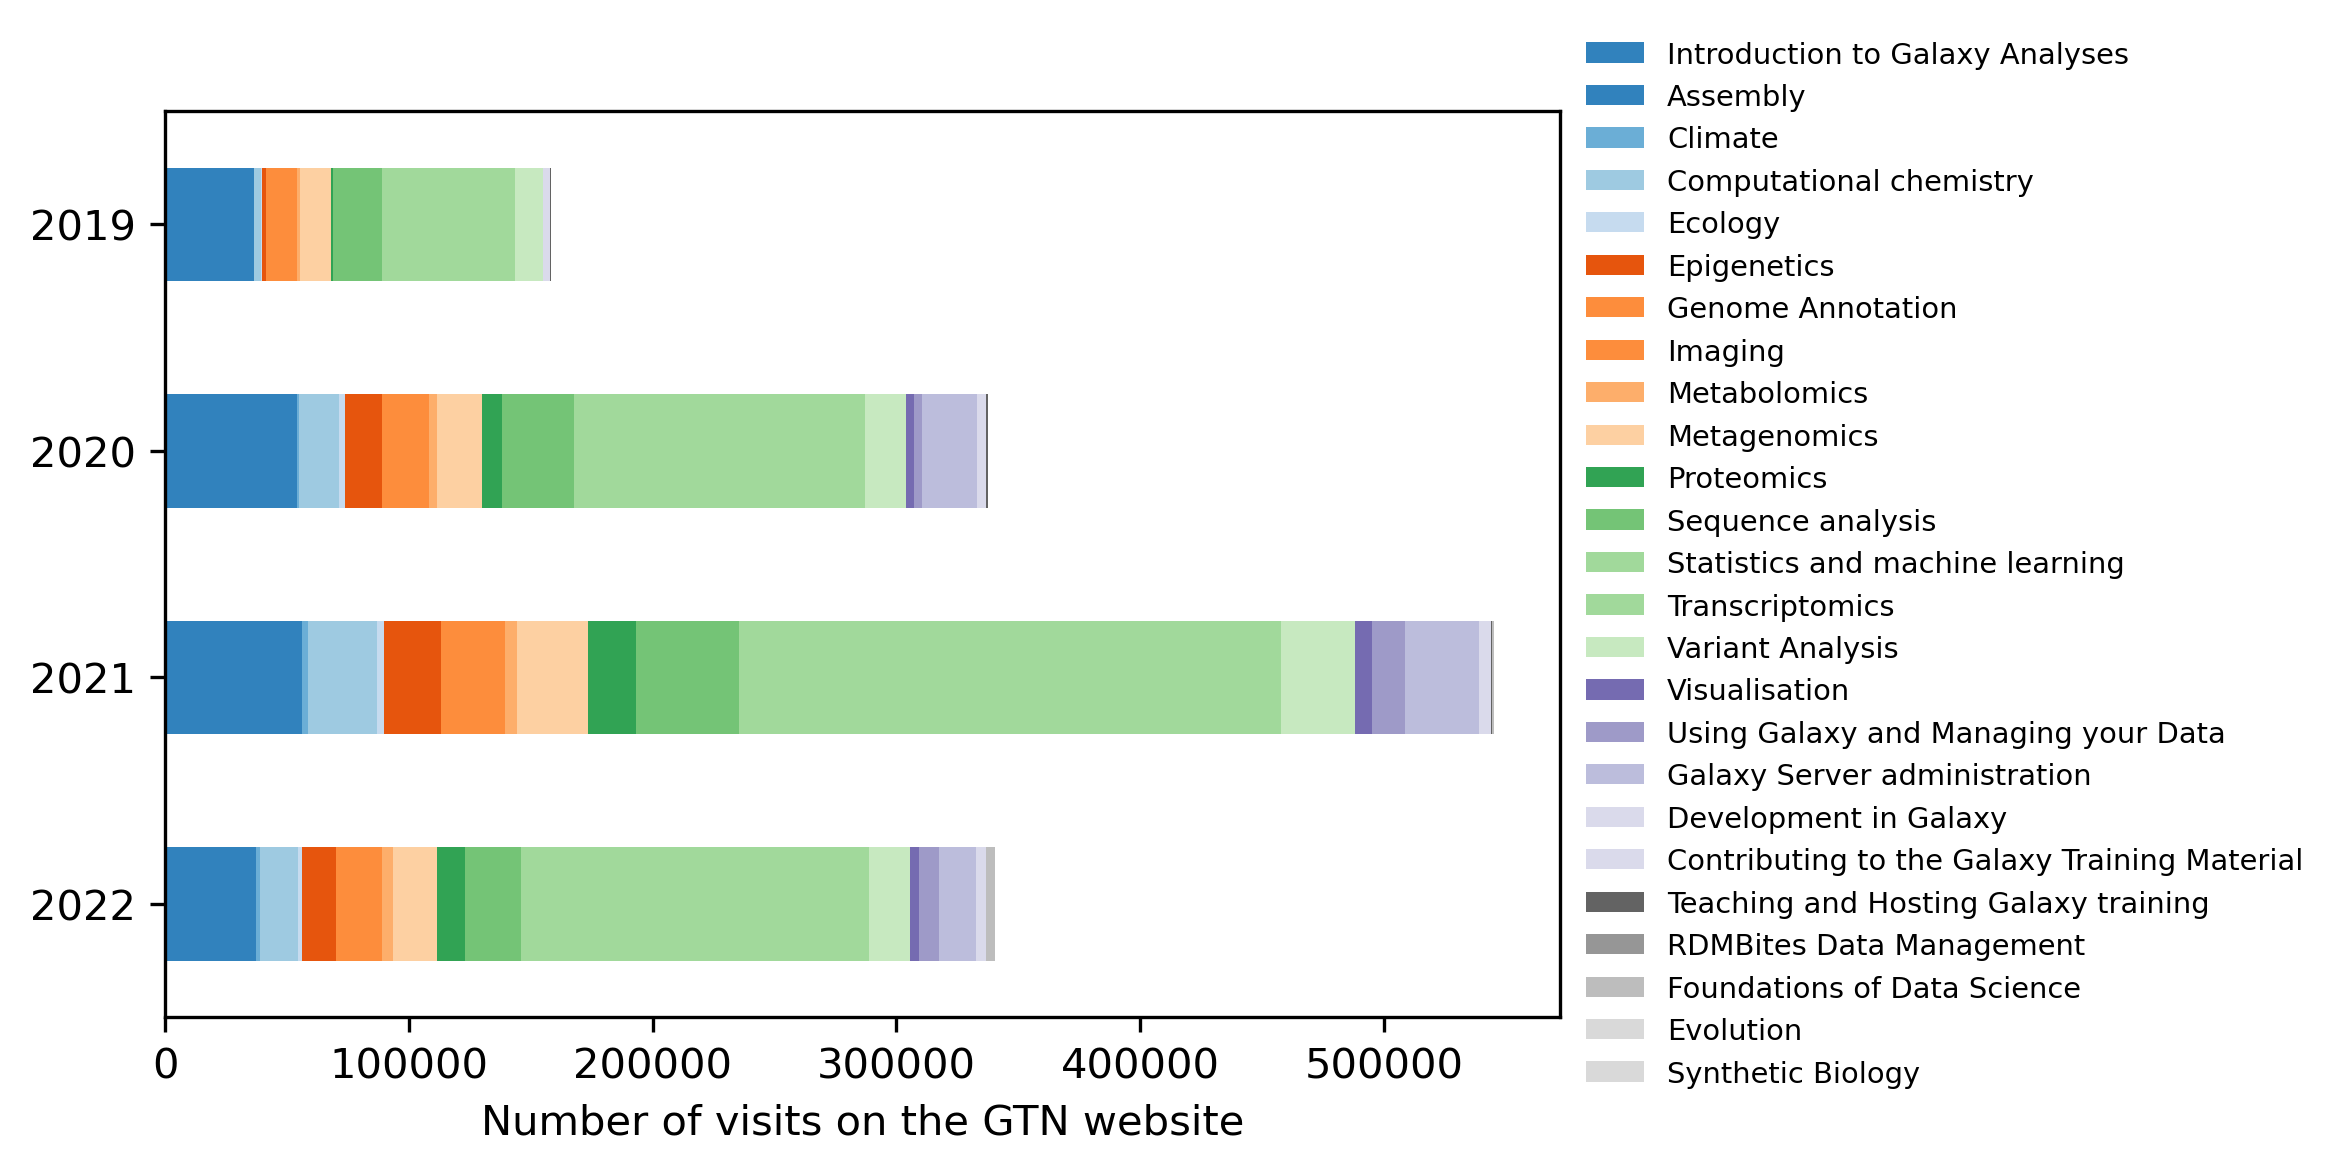

In [22]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(df
    .drop(columns=['All'])
    .drop(['Total'], axis=0)
    .plot.barh(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Number of visits on the GTN website')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')
plt.savefig('../images/analytics-topics-users.png', bbox_inches='tight')